[(470, 590)]

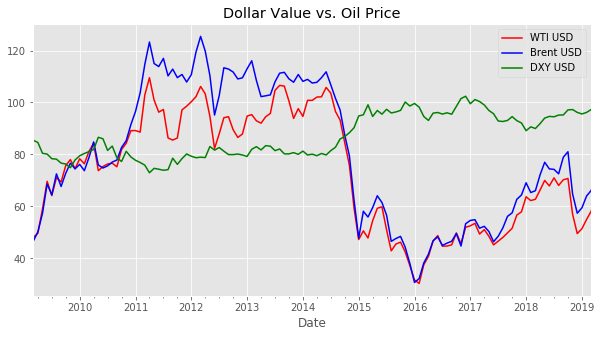

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('ggplot')
#option to shrink display of df after given number of rows
pd.set_option('display.max_rows', 15)

#import oil prices and dollar index
brent = pd.read_csv('Desktop\Python\Oil\MCOILBRENTEU.csv')#ticker BZ=F only has data going back to Jan 2020
wti = pd.read_csv('Desktop\Python\Oil\DCOILWTICO.csv')#this data can by pulled using yfinance and ticker CL=F
dxy = pd.read_csv('Desktop\Python\Oil\DX-Y.NYB.csv') #this data can by pulled using yfinance and ticker DX-Y.NYB


#rename columns for cleaning
brent.rename(columns = {'DATE': 'Date'}, inplace = True)
wti.rename(columns = {'DATE': 'Date'}, inplace = True)
#merge to one df for analysis
wti = wti.merge(brent, on ='Date', how ='left').merge(dxy, on ='Date', how ='left')[0:132].set_index('Date')
wti.index = pd.to_datetime(wti.index)
wti = wti.rename(columns = {'DCOILWTICO': 'WTI USD', 'MCOILBRENTEU': 'Brent USD', 'Close': 'DXY USD'})

wti[['WTI USD', 'Brent USD', 'DXY USD']].plot(figsize = (10, 5), title = 'Dollar Value vs. Oil Price', color = ['r', 'b', 'g']).set(xlim=('2009-03-01', '2019-03-01'))


[*********************100%***********************]  1 of 1 completed


[(1, 5), (735658.0, 737638.0)]

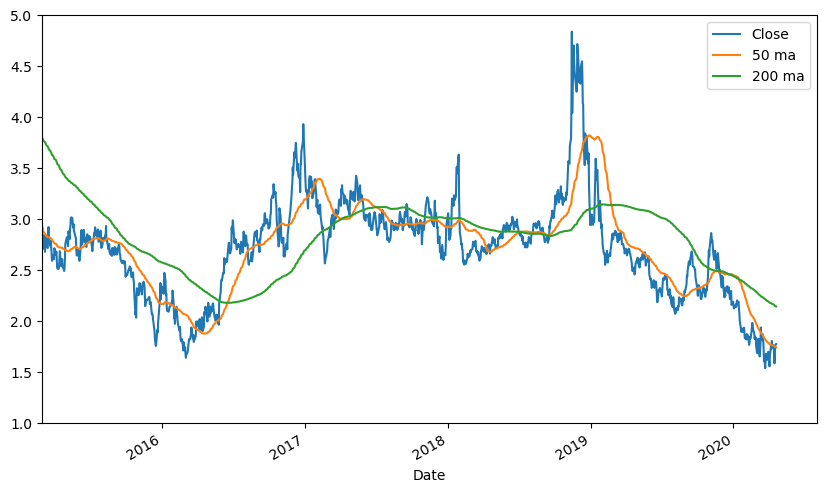

In [256]:
import yfinance as yf
import numpy as np
import pandas as pd

natgas = yf.download('NG=F')
natgas['50 ma'] = natgas['Close'].rolling(window = 50).mean()
natgas['200 ma'] = natgas['Close'].rolling(window = 200).mean()
natgas[['Close', '50 ma', '200 ma']].plot(figsize = (10,6)).set(xlim = ('2015-03-01', '2020-08-01'), ylim = (1, 5))

# ng = yf.Ticker('NG=F')
# ng.history(period = 'max')['Close'].plot()


[*********************100%***********************]  1 of 1 completed


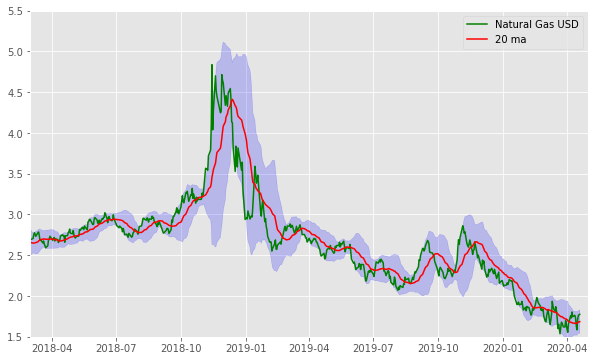

In [26]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

#create 20d moving avg and upper and lower bands
natgas = yf.download('NG=F')
natgas['20 ma'] = natgas['Close'].rolling(window = 20).mean()
natgas['Std'] = natgas['Close'].rolling(window = 20).std()
natgas['Upper'] = natgas['20 ma'] + (natgas['Std'] * 2) 
natgas['Lower'] = natgas['20 ma'] - (natgas['Std'] * 2)

#plot using pandas.plot
#natgas[['20 ma', 'Upper', 'Lower']].plot(figsize = (10,6), color = ['r', 'b', 'y']).set(xlim = ('2015-03-01', '2020-08-01'), ylim = (1, 6))

#plot using matplotlib
plt.style.use('ggplot')
natgas.index = pd.to_datetime(natgas.index)
x = natgas.index
fig = plt.figure(figsize = (10,6))
bb = fig.add_subplot()
bb.plot(x, natgas['Close'], color = 'g')
bb.plot(x, natgas['20 ma'], color = 'r')
# bb.plot(x, natgas['Upper'], color = 'b', linewidth = 0.5)
# bb.plot(x, natgas['Lower'], color = 'g', linewidth = 0.5)
bb.set_xlim([dt.strptime('2018-03-01', '%Y-%m-%d'), dt.strptime('2020-05-01', '%Y-%m-%d')])
bb.set_ylim([1.5 ,5.5])
bb.legend(['Natural Gas USD', '20 ma', 'Upper', 'Lower'])

bb.fill_between(x, natgas['Lower'], natgas['Upper'], color = 'b', alpha = 0.2)

[*********************100%***********************]  1 of 1 completed


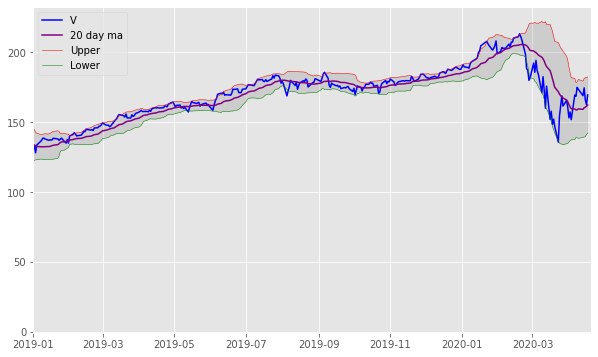

In [21]:
#attempt to make this a function that graphs bollinger bands over a given time range
#next step would be autofitting the y-bounds of the graph

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime as dt

def bollinger(Ticker, start = '2010-01-01', end = None):
    
    if end is None:
        date = datetime.date.today()
        end = date.strftime('%Y-%m-%d')
    data = yf.download(Ticker)
    
    #create 20d moving avg and upper and lower bands
    data['20 ma'] = data['Close'].rolling(window = 20).mean()
    data['Std'] = data['Close'].rolling(window = 20).std()
    data['Upper'] = data['20 ma'] + (data['Std'] * 2) 
    data['Lower'] = data['20 ma'] - (data['Std'] * 2)


    #plot using matplotlib
    plt.style.use('ggplot')
    data.index = pd.to_datetime(data.index)
    x = data.index
    fig = plt.figure(figsize = (10,6))
    bb = fig.add_subplot()
    bb.plot(x, data['Close'], color = 'b')
    bb.plot(x, data['20 ma'], color = 'purple')
    bb.plot(x, data['Upper'], color = 'r', linewidth = 0.5)
    bb.plot(x, data['Lower'], color = 'g', linewidth = 0.5)
    bb.set_xlim([dt.strptime(start, '%Y-%m-%d'), dt.strptime(end, '%Y-%m-%d')])
#     bb.set_ylim([1.5 ,5.5])
    bb.legend(['{}'.format(Ticker), '20 day ma', 'Upper', 'Lower'])
    bb.fill_between(x, data['Lower'], data['Upper'], color = 'k', alpha = 0.1)
    
    
bollinger('V', '2019-01-01')